# Exploratory Data Analysis, Linear Regression, and Time Series Modeling with COVID19 Worldwide Aggregated Data. 

In [1]:
# first step get data
!wget https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv

--2020-05-07 16:40:05--  https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5192 (5.1K) [text/plain]
Saving to: ‘worldwide-aggregated.csv’

worldwide-aggregate 100%[===================>]   5.07K  --.-KB/s    in 0s      

2020-05-07 16:40:05 (17.5 MB/s) - ‘worldwide-aggregated.csv’ saved [5192/5192]



In [2]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# open csv file 
covid_data = pd.read_csv('worldwide-aggregated.csv')
# get shape of data
covid_data.shape

(106, 5)

In [4]:
# get info about dataframe
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
Date             106 non-null object
Confirmed        106 non-null int64
Recovered        106 non-null int64
Deaths           106 non-null int64
Increase rate    105 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [5]:
# check out the head of the data
covid_data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [6]:
# check out the tail
covid_data.tail()

,Date,Confirmed,Recovered,Deaths,Increase rate
101,2020-05-02,3427343,1093112,243808,2.499150
102,2020-05-03,3506729,1125236,247470,2.316255
103,2020-05-04,3583055,1162724,251537,2.176558
104,2020-05-05,3662691,1198832,257239,2.222573
105,2020-05-06,3755341,1245413,263831,2.529561


In [7]:
# fill in missing values
covid_data = covid_data.fillna(0)
covid_data[:5]

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,0.000000
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [8]:
# get descriptive stats on the data
covid_data.describe()

,Confirmed,Recovered,Deaths,Increase rate
count,1.060000e+02,1.060000e+02,106.000000,106.000000
mean,8.955462e+05,2.479965e+05,58846.462264,9.278812
std,1.162761e+06,3.423312e+05,83208.630240,12.840229
min,5.550000e+02,2.800000e+01,17.000000,0.000000
25%,7.372750e+04,1.302525e+04,1902.750000,2.666570
50%,1.617910e+05,7.432900e+04,6151.000000,4.740523
75%,1.634831e+06,3.705658e+05,106305.250000,10.629722
max,3.755341e+06,1.245413e+06,263831.000000,90.570550


In [9]:
# set date to index
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data = covid_data.set_index('Date')

Text(0, 0.5, 'Deaths')

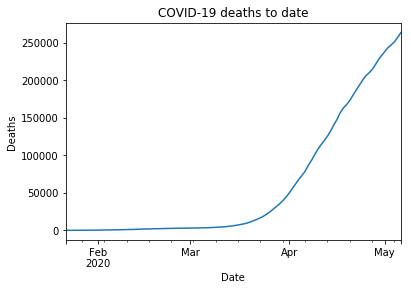

In [10]:
# real quick, let's do a line plot of deaths over time
covid_data['Deaths'].plot.line()
plt.title('COVID-19 deaths to date')
plt.ylabel('Deaths')

Text(0, 0.5, '% of recovered patients')

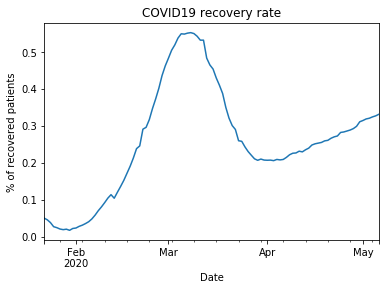

In [11]:
# calculate recovery Rate
(covid_data['Recovered'] / covid_data['Confirmed']).plot.line()
plt.title("COVID19 recovery rate")
plt.ylabel('% of recovered patients')

Text(0.5, 1.0, 'Aggregated worldwide COVID-19 mortality rate')

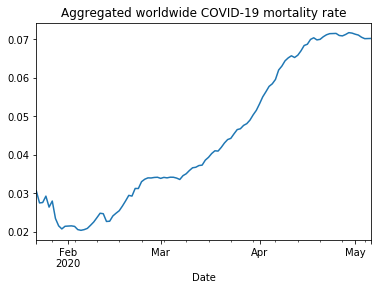

In [12]:
# calculate mortality rate
(covid_data['Deaths'] / covid_data['Confirmed']).plot.line()
plt.title("Aggregated worldwide COVID-19 mortality rate")

Text(0.5, 1.0, 'Increase in COVID-19 cases worldwide')

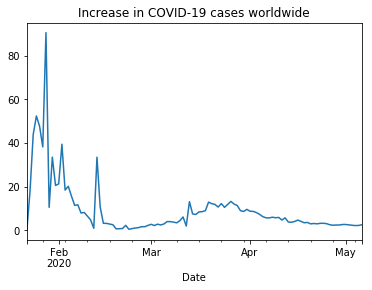

In [13]:
# plot increase rate
covid_data['Increase rate'].plot.line()
plt.title("Increase in COVID-19 cases worldwide")

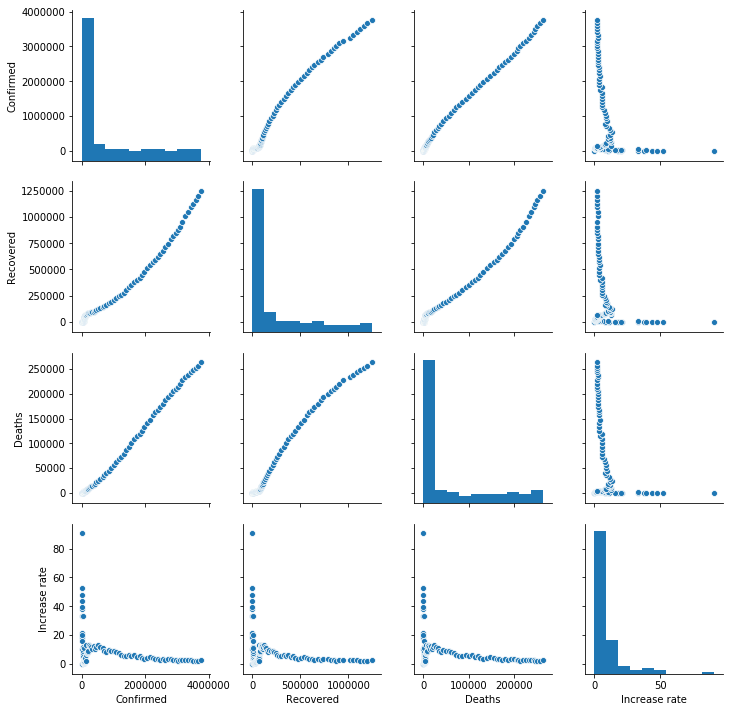

In [14]:
# Use seaborn pairplot to visualize correlations in covid-19 dataset
sns.pairplot(covid_data)

In [15]:
# just the numbers on how the variables correlate
covid_data.corr()

,Confirmed,Recovered,Deaths,Increase rate
Confirmed,1.000000,0.987931,0.998202,-0.308342
Recovered,0.987931,1.000000,0.991173,-0.304211
Deaths,0.998202,0.991173,1.000000,-0.298765
Increase rate,-0.308342,-0.304211,-0.298765,1.000000


In [16]:
# use highest corr var as X 
X = covid_data['Confirmed'].values.reshape(-1,1)
y = covid_data['Deaths'].values.reshape(-1,1)

In [17]:
# split the data 80% in train and 20% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [18]:
# check to make sure X and y have the same shape
X_train.shape, y_train.shape

((84, 1), (84, 1))

In [19]:
# fit regression model to training data
lr = LinearRegression().fit(X_train, y_train)

In [20]:
# display intercept and coef
print('intercept:', lr.intercept_, 'coef:', lr.coef_)

intercept: [-4743.07296556] coef: [[0.07122419]]


In [21]:
# now predict values of regression set 
y_pred = lr.predict(X_test)

In [22]:
# create and display a dataframe with actual and predicted numbers of deaths
df = pd.DataFrame({'Actual # of Deaths': y_test.flatten(), 'Predicted # of Deaths': y_pred.flatten()})
df

,Actual # of Deaths,Predicted # of Deaths
0,31797,42323.578081
1,2770,1053.721030
2,13125,16948.608798
3,93354,100682.966159
4,2996,1550.937068
5,8823,10559.158356
6,7956,9296.139877
7,163214,160307.509442
8,2458,853.153724
9,11422,14647.497818


In [23]:
# now let's look at the error in this model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3778.0397243537705
Mean Squared Error: 25825026.970392775
Root Mean Squared Error: 5081.833032518166


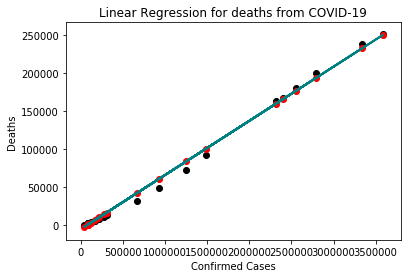

In [24]:
# linear regression line plot with test data
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred,  color='red')
plt.plot(X_test, y_pred,  color='teal',linewidth=2)

plt.title('Linear Regression for deaths from COVID-19')  
plt.xlabel('Confirmed Cases')  
plt.ylabel('Deaths')

plt.show()

In [25]:
# Use score to get accuracy of model
score = lr.score(X_test, y_test)
print('Model accuracy score:', score)

Model accuracy score: 0.996473300985548


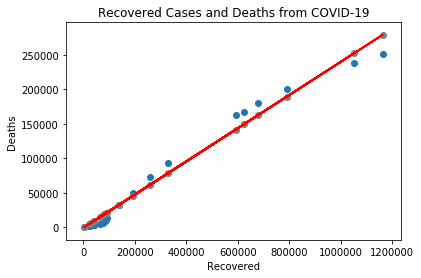

intercept: [-484.67611832] coef: [[0.24029459]]
Mean Absolute Error: 10206.594841895103
Mean Squared Error: 148514146.00387374
Root Mean Squared Error: 12186.638010701465
Model accuracy score: 0.9797187165401791


In [26]:
# Now let's redraw the line for the second highest correlated var, Recovered
X = covid_data['Recovered'].values.reshape(-1,1)
y = covid_data['Deaths'].values.reshape(-1,1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

#from sklearn.linear_model import LogisticRegression
# fit regression model to training data
lr = LinearRegression().fit(X_train, y_train)

# now predict values of regression set 
y_pred = lr.predict(X_test)

# Display dataframe of actual and predicted # of deaths
df = pd.DataFrame({'Actual # of Deaths': y_test.flatten(), 'Predicted # of Deaths': y_pred.flatten()})
df

# linear regression line plot with test data
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='gray')
plt.plot(X_test, y_pred, color='red',linewidth=2)
plt.title('Recovered Cases and Deaths from COVID-19')  
plt.xlabel('Recovered')  
plt.ylabel('Deaths')  

plt.show()

# display intercept and coef
print('intercept:', lr.intercept_, 'coef:', lr.coef_)
#print()

# display error 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Use score to get accuracy of model
score = lr.score(X_test, y_test)
print('Model accuracy score:', score)

In [27]:
# check column titles
covid_data.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Increase rate'], dtype='object')

In [28]:
# Let's try to use the ARIMA and ARMA models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [29]:
# a different way to set date to index
data = pd.read_csv('worldwide-aggregated.csv', index_col="Date")

# fill empty obs with zero
data = data.fillna(0)

# create a log of y
log_deaths = np.log(data['Deaths'])
log_recovered = np.log(data['Recovered'])
log_confirmed = np.log(covid_data['Confirmed'])

np.exp(log_deaths).head()

Date
2020-01-22    17.0
2020-01-23    18.0
2020-01-24    26.0
2020-01-25    42.0
2020-01-26    56.0
Name: Deaths, dtype: float64

In [30]:
# fit model
arma = ARMA(log_deaths, order=(2, 0, 3)).fit()
# make prediction
arma_y_pred = arma.predict()
# make dataframe with predicted and actual values
df = pd.DataFrame({'Predicted': np.exp(arma_y_pred), 'Actual': np.exp(log_deaths)})
# display last five
df[-5:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


,Predicted,Actual
2020-05-02,242234.754112,243808.0
2020-05-03,247337.963454,247470.0
2020-05-04,249685.404679,251537.0
2020-05-05,254077.569627,257239.0
2020-05-06,261147.511264,263831.0


In [31]:
# get summary of model 
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Deaths   No. Observations:                  106
Model:                     ARMA(2, 0)   Log Likelihood                 124.697
Method:                       css-mle   S.D. of innovations              0.071
Date:                Thu, 07 May 2020   AIC                           -241.394
Time:                        16:40:12   BIC                           -230.740
Sample:                    01-22-2020   HQIC                          -237.076
                         - 05-06-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.8517      4.022      1.952      0.054      -0.032      15.735
ar.L1.Deaths     1.8246      0.039     47.326      0.000       1.749       1.900
ar.L2.Deaths    -0.8254      0.039    -21.317      0.000      -0.901      -0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0044           +0.0000j            1.0044            0.0000
AR.2            1.2063           +0.0000j            1.2063            0.0000
-----------------------------------------------------------------------------
"""

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Text(0.5, 1.0, 'COVID-19 deaths forecast')

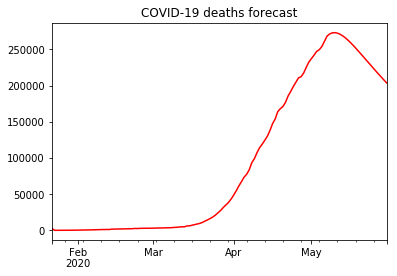

In [32]:
# forecast the number of deaths 
deaths_forecast = arma.predict(start='2020-01-22', end='2020-5-30')
# plot the forecast
np.exp(deaths_forecast).plot.line(color='red')
plt.title("COVID-19 deaths forecast")

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


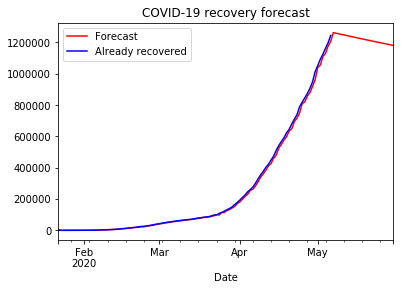

In [33]:
# fit model for recovery forecast
arma_recovered = ARMA(log_recovered, order=(1,1,0)).fit()
# make prediction
arma_y_pred = arma_recovered.predict()
# make dataframe with predicted and actual values
df = pd.DataFrame({'Predicted': np.exp(arma_y_pred), 'Actual': np.exp(log_recovered)})
# display last five
df[-5:]
# forecast the number of deaths 
recovered_forecast = arma_recovered.predict(start='2020-01-22', end='2020-5-30')
# plot
np.exp(recovered_forecast).plot.line(color='red', label='Forecast')
covid_data['Recovered'].plot(color='blue', label='Already recovered')
plt.title('COVID-19 recovery forecast')

plt.legend()

In [34]:
arma_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Recovered   No. Observations:                  106
Model:                     ARMA(1, 1)   Log Likelihood                  76.524
Method:                       css-mle   S.D. of innovations              0.113
Date:                Thu, 07 May 2020   AIC                           -145.049
Time:                        16:40:13   BIC                           -134.395
Sample:                    01-22-2020   HQIC                          -140.731
                         - 05-06-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.7608      5.180      1.691      0.094      -1.393      18.914
ar.L1.Recovered     0.9994      0.001   1289.849      0.000       0.998       1.001
ma.L1.Recovered     0.5398      0.074      7.316      0.000       0.395       0.684
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1           -1.8525           +0.0000j            1.8525            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
# now let's do fit an arima model 
arima= ARIMA(log_deaths, order=(3,1,2)).fit() #random walk 
# make prediction
arima_y_pred = arima.predict()
# display table with predicted and actual values
df = pd.DataFrame({'ARIMA Predicted': np.exp(arima_y_pred), 'Actual': np.exp(log_deaths)})
df[-5:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,ARIMA Predicted,Actual
2020-05-02,1.031385,243808.0
2020-05-03,1.030056,247470.0
2020-05-04,1.034416,251537.0
2020-05-05,1.029122,257239.0
2020-05-06,1.025668,263831.0


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


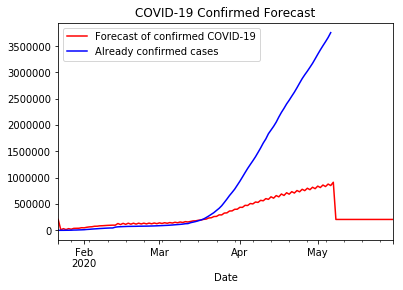

In [36]:
# forecast confirmed number of cases of covid-19
arma_confirmed = ARMA(log_confirmed, order=(0,1,1)).fit()
confirmed_forecast = arma_confirmed.predict(start='2020-01-22', end='2020-5-30')

# plot the forecast against the actual number of confirmed cases so far
np.exp(confirmed_forecast).plot.line(color='red', label='Forecast of confirmed COVID-19')
covid_data['Confirmed'].plot(color='blue', label='Already confirmed cases')
plt.title('COVID-19 Confirmed Forecast')

plt.legend()

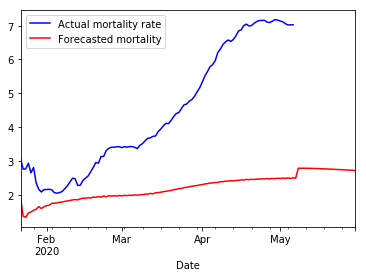

In [37]:
# plot current mortality rate plotted against the forecast
(covid_data['Deaths'] / covid_data['Confirmed']*100).plot.line(color='blue', label='Actual mortality rate' )
np.exp((deaths_forecast/confirmed_forecast)).plot.line(color='red', label='Forecasted mortality')

plt.legend()

In [38]:
# last 60 forecasted dates
np.exp(deaths_forecast)[-60:]

2020-04-01     48533.127276
2020-04-02     54542.307865
2020-04-03     61314.156722
2020-04-04     67083.532986
2020-04-05     73355.192733
2020-04-06     77375.043041
2020-04-07     83583.797277
2020-04-08     93526.294186
2020-04-09     99000.396654
2020-04-10    107257.782065
2020-04-11    114152.587662
2020-04-12    119042.335708
2020-04-13    124422.096907
2020-04-14    130100.079112
2020-04-15    137994.147642
2020-04-16    147385.754377
2020-04-17    153781.257530
2020-04-18    164011.670334
2020-04-19    168182.173685
2020-04-20    171099.744512
2020-04-21    177065.617534
2020-04-22    185763.185143
2020-04-23    191998.610877
2020-04-24    198784.911875
2020-04-25    204717.699849
2020-04-26    210750.825615
2020-04-27    212319.448247
2020-04-28    217552.409584
2020-04-29    225438.901428
2020-04-30    232716.162131
2020-05-01    237365.801989
2020-05-02    242234.754112
2020-05-03    247337.963454
2020-05-04    249685.404679
2020-05-05    254077.569627
2020-05-06    261147

In [39]:
# find the max number of predicted deaths and on which day. 
for k, v in deaths_forecast.items():
    if np.exp(v) == np.exp(deaths_forecast).max():
        print(np.exp(v).round(), 'covid-19 deaths predicted to be reported on', k)

273255.0 covid-19 deaths predicted to be reported on 2020-05-10 00:00:00
